# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Saving WhatsApp Image 2025-12-05 at 15.59.07_58e14e4d.jpg to WhatsApp Image 2025-12-05 at 15.59.07_58e14e4d.jpg


(np.float64(-0.5), np.float64(1599.5), np.float64(1599.5), np.float64(-0.5))

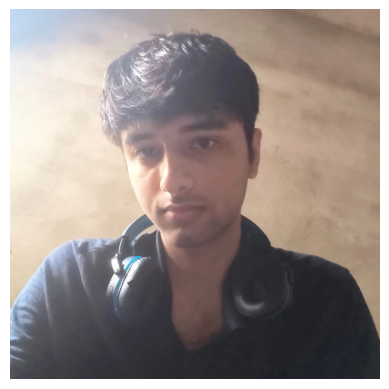

In [ ]:
from google.colab import files
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()
filename = next(iter(uploaded))


img_pil = Image.open(io.BytesIO(uploaded[filename])).convert('RGB')
img_rgb = np.asarray(img_pil)

plt.imshow(img_rgb)
plt.axis("off")


(np.float64(-0.5), np.float64(1599.5), np.float64(1599.5), np.float64(-0.5))

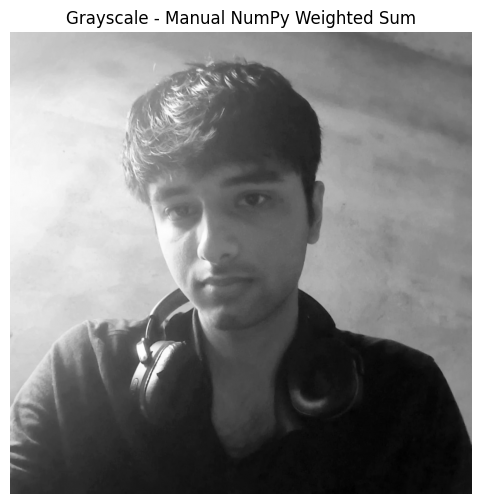

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert RGB → Grayscale manually using weighted sum
img_float = img_rgb.astype(np.float32) / 255.0

gray_manual = (
    0.299 * img_float[..., 0] +
    0.587 * img_float[..., 1] +
    0.114 * img_float[..., 2]
)


gray_manual = (gray_manual * 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(gray_manual, cmap='gray')
plt.title("Grayscale - Manual NumPy Weighted Sum")
plt.axis("off")


(np.float64(-0.5), np.float64(1599.5), np.float64(1599.5), np.float64(-0.5))

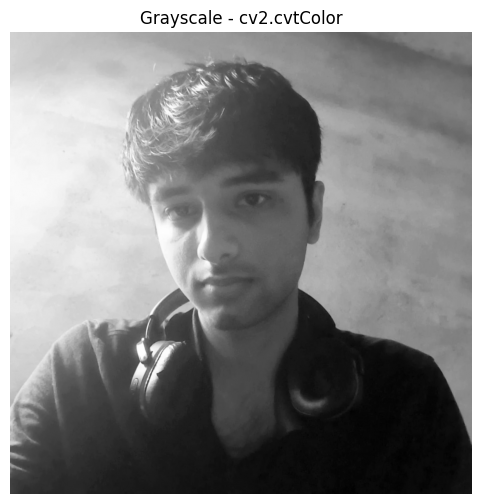

In [ ]:
import cv2

# Convert RGB → BGR for cv2
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(gray_cv, cmap='gray')
plt.title("Grayscale - cv2.cvtColor")
plt.axis("off")


In [ ]:
print("RGB shape  :", img_rgb.shape)
print("Manual Gray:", gray_manual.shape)
print("cv2 Gray   :", gray_cv.shape)


RGB shape  : (1600, 1600, 3)
Manual Gray: (1600, 1600)
cv2 Gray   : (1600, 1600)


In [ ]:

coords = [
    (0,0),
    (100,100),
    (200,200),
]

for r, c in coords:
    print(f"\nPixel at ({r},{c}):")
    print("  RGB         :", img_rgb[r, c])
    print("  Gray Manual :", gray_manual[r, c])
    print("  Gray cv2    :", gray_cv[r, c])



Pixel at (0,0):
  RGB         : [193 219 244]
  Gray Manual : 214
  Gray cv2    : 214

Pixel at (100,100):
  RGB         : [189 210 231]
  Gray Manual : 206
  Gray cv2    : 206

Pixel at (200,200):
  RGB         : [234 230 227]
  Gray Manual : 230
  Gray cv2    : 231


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

Using existing variable: gray_manual


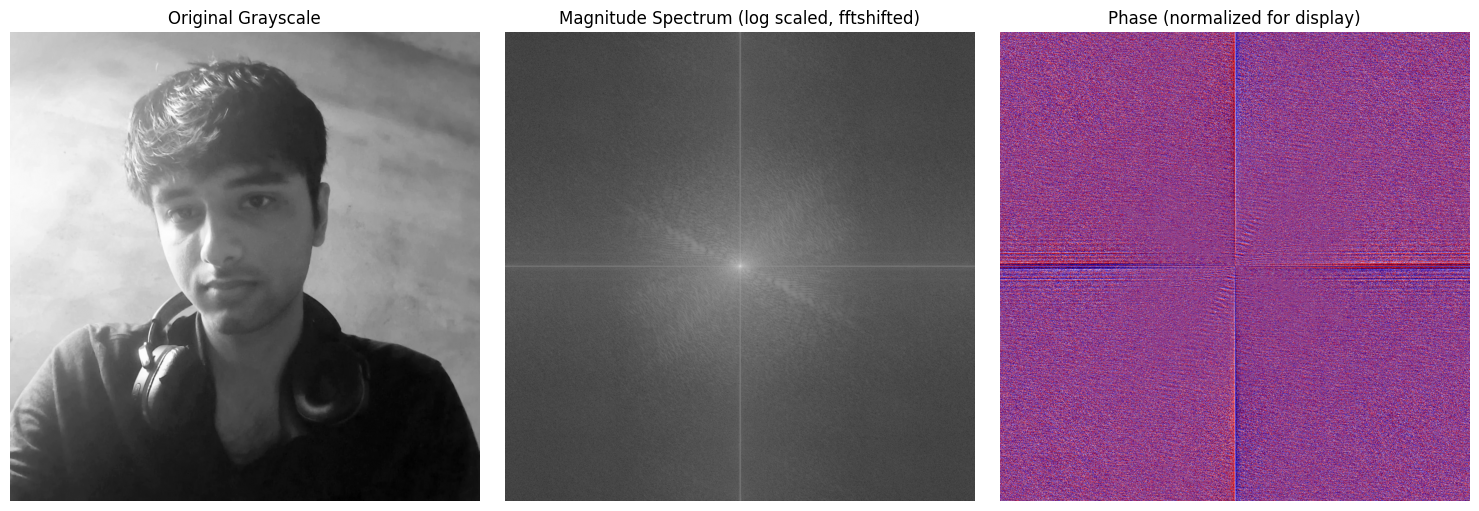

Image shape: (1600, 1600)
FFT shape: (1600, 1600)
Magnitude dtype: float32   min/max: 0.77961266 342270140.0
Index of max magnitude (row, col): (np.int64(800), np.int64(800))

Magnitude values around center (small patch):
[[1.3508050e+06 1.6911872e+06 2.5704552e+06 1.3886492e+06 1.8151309e+06
  9.6025670e+06 1.2466224e+06 2.7372752e+06 3.6412858e+06 3.0703305e+06
  4.4518572e+05]
 [2.7697810e+06 2.5303610e+06 3.4129760e+06 1.9131472e+06 1.2331420e+06
  1.4010892e+07 4.8655040e+06 4.3749905e+06 2.9664335e+06 1.0186758e+06
  2.4300895e+06]
 [2.2170815e+06 2.4420512e+06 2.2510640e+06 4.0631715e+06 4.8178705e+06
  1.5772155e+07 6.9479125e+06 6.1995835e+06 8.7158120e+06 3.0174682e+06
  9.4999400e+05]
 [1.4590948e+06 6.4166130e+06 1.5813916e+06 5.2323095e+06 1.2679462e+07
  3.1387290e+07 7.8916050e+06 5.0553605e+06 1.9710302e+06 5.6545275e+06
  1.1348628e+06]
 [1.4873610e+06 3.8430900e+06 6.5564550e+06 1.3298262e+07 1.2893686e+07
  7.0530992e+07 1.2254058e+07 1.8684774e+07 3.9530458e+06 4.05

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
from google.colab import files
import warnings
warnings.filterwarnings("ignore")


if 'gray_manual' in globals():
    gray = gray_manual.copy()
    print("Using existing variable: gray_manual")
else:
    print("No variable `gray_manual` found. Please upload an image; it will be converted to grayscale now.")
    uploaded = files.upload()
    fname = next(iter(uploaded))
    img = Image.open(io.BytesIO(uploaded[fname])).convert('RGB')
    arr = np.asarray(img).astype(np.float32) / 255.0

    gray_norm = 0.299*arr[...,0] + 0.587*arr[...,1] + 0.114*arr[...,2]
    gray = (gray_norm * 255.0).round().astype(np.uint8)


gray_float = gray.astype(np.float32)

#B1)
F = np.fft.fft2(gray_float)
fshift = np.fft.fftshift(F)


globals()['fshift'] = fshift

# B2)
magnitude = np.abs(fshift)
phase = np.angle(fshift)


mag_log = np.log1p(magnitude)


def normalize(img):
    img = img.astype(np.float64)
    mn, mx = img.min(), img.max()
    if mx - mn == 0:
        return np.zeros_like(img)
    return (img - mn) / (mx - mn)

mag_display = normalize(mag_log)
phase_display = normalize(phase)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mag_display, cmap='gray')
plt.title("Magnitude Spectrum (log scaled, fftshifted)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(phase_display, cmap='seismic')
plt.title("Phase (normalized for display)")
plt.axis('off')

plt.tight_layout()
plt.show()


print("Image shape:", gray.shape)
print("FFT shape:", fshift.shape)
print("Magnitude dtype:", magnitude.dtype, "  min/max:", magnitude.min(), magnitude.max())


max_idx = np.unravel_index(np.argmax(magnitude), magnitude.shape)
print("Index of max magnitude (row, col):", max_idx)


h, w = magnitude.shape
center = (h//2, w//2)
patch_size = 5
r0 = max(0, center[0]-patch_size)
r1 = min(h, center[0]+patch_size+1)
c0 = max(0, center[1]-patch_size)
c1 = min(w, center[1]+patch_size+1)
print("\nMagnitude values around center (small patch):")
print(np.round(magnitude[r0:r1, c0:c1], 2))


sample_coords = [(0,0), (h//4, w//4), center, (h-1, w-1)]
print("\nSample (row,col):  magnitude  |  phase (rad)")
for (r,c) in sample_coords:
    print((r,c), np.round(magnitude[r,c],2), np.round(phase[r,c],3))



## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Saving WhatsApp Image 2025-12-05 at 15.59.07_58e14e4d.jpg to WhatsApp Image 2025-12-05 at 15.59.07_58e14e4d (1).jpg
RGB shape: (1600, 1600, 3)
Manual gray shape: (1600, 1600) cv2 gray shape: (1600, 1600)
pixel (0,0): RGB=[193, 219, 244]  manual=214  cv2=214
pixel (50,50): RGB=[194, 216, 239]  manual=212  cv2=212
pixel (100,100): RGB=[189, 210, 231]  manual=206  cv2=206
FFT done. fshift shape: (1600, 1600)


(np.float64(-0.5), np.float64(1599.5), np.float64(1599.5), np.float64(-0.5))

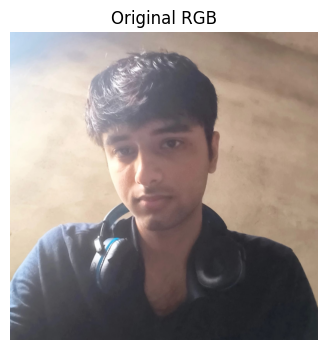

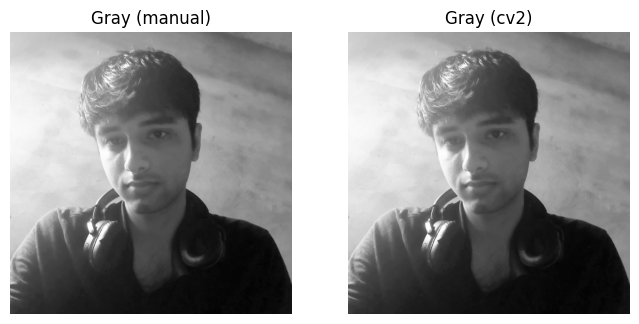

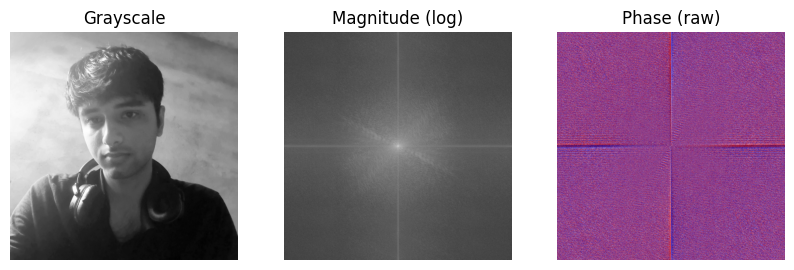

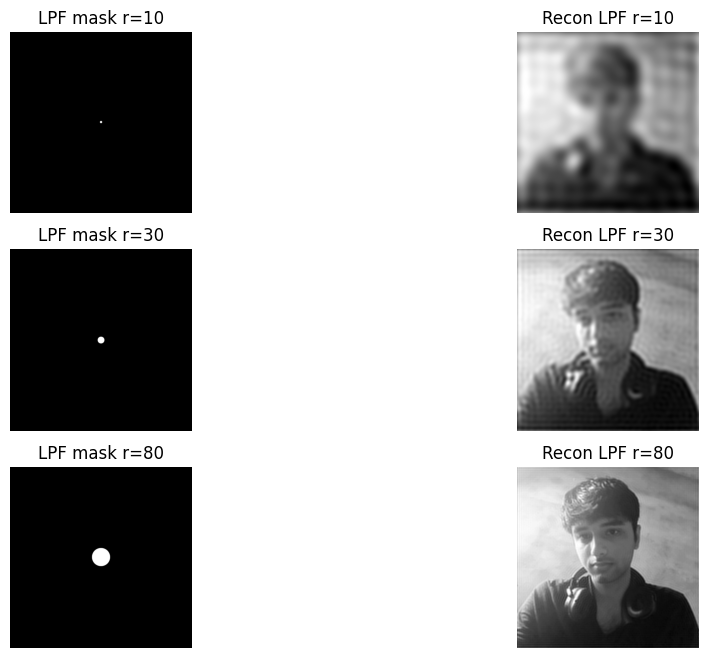

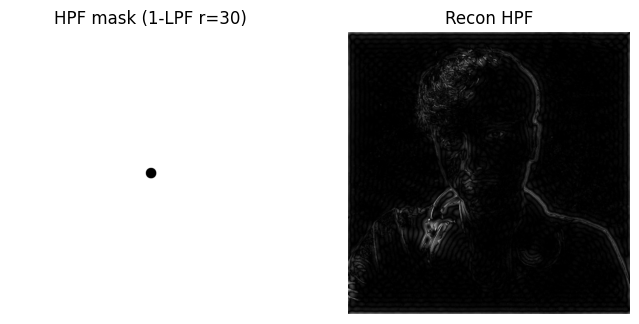

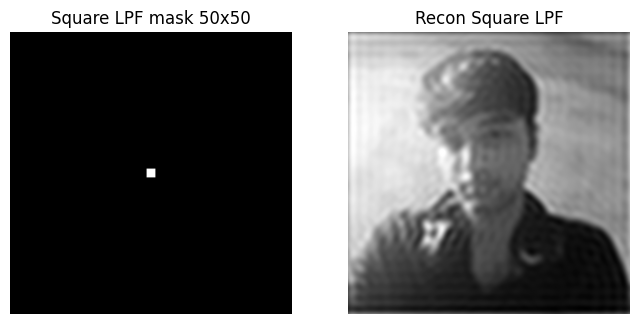

In [ ]:

from google.colab import files
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import cv2


uploaded = files.upload()
fname = next(iter(uploaded))
img = Image.open(io.BytesIO(uploaded[fname])).convert('RGB')
img_rgb = np.array(img)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title('Original RGB')
plt.axis('off')


img_f = img_rgb.astype(np.float32) / 255.0
gray_manual = (0.299*img_f[...,0] + 0.587*img_f[...,1] + 0.114*img_f[...,2])
gray_manual = np.clip((gray_manual*255).round(), 0, 255).astype(np.uint8)


gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(gray_manual, cmap='gray'); plt.title('Gray (manual)'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(gray_cv, cmap='gray'); plt.title('Gray (cv2)'); plt.axis('off')


print("RGB shape:", img_rgb.shape)
print("Manual gray shape:", gray_manual.shape, "cv2 gray shape:", gray_cv.shape)
coords = [(0,0), (50,50), (100,100)]
for r,c in coords:
    if r < gray_manual.shape[0] and c < gray_manual.shape[1]:
        print(f"pixel ({r},{c}): RGB={img_rgb[r,c].tolist()}  manual={int(gray_manual[r,c])}  cv2={int(gray_cv[r,c])}")


gray = gray_manual.astype(np.float32)
F = np.fft.fft2(gray)
fshift = np.fft.fftshift(F)
magnitude = np.abs(fshift)
phase = np.angle(fshift)


mag_log = np.log1p(magnitude)
mag_disp = (mag_log - mag_log.min()) / (mag_log.max() - mag_log.min())

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(mag_disp, cmap='gray'); plt.title('Magnitude (log)'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(phase, cmap='seismic'); plt.title('Phase (raw)'); plt.axis('off')

print("FFT done. fshift shape:", fshift.shape)


def circular_mask(shape, radius):
    H,W = shape
    cy,cx = H//2, W//2
    Y,X = np.ogrid[:H,:W]
    mask = ((X-cx)**2 + (Y-cy)**2) <= radius*radius
    return mask.astype(np.float32)

def reconstruct_from_mask(fshift, mask):

    Ff = fshift * mask
    F_ishift = np.fft.ifftshift(Ff)
    img_back = np.fft.ifft2(F_ishift)
    img_back = np.abs(img_back)
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return img_back

#C1
radii = [10, 30, 80]
plt.figure(figsize=(12,8))
for i,r in enumerate(radii,1):
    m = circular_mask(fshift.shape, r)
    out = reconstruct_from_mask(fshift, m)
    plt.subplot(3,2,(i-1)*2+1); plt.imshow(m, cmap='gray'); plt.title(f'LPF mask r={r}'); plt.axis('off')
    plt.subplot(3,2,(i-1)*2+2); plt.imshow(out, cmap='gray'); plt.title(f'Recon LPF r={r}'); plt.axis('off')


# smaller radius => keep fewer low frequencies => more blur. larger radius => less blur.

#  C2
r = 30
lpf = circular_mask(fshift.shape, r)
hpf = 1.0 - lpf
out_hpf = reconstruct_from_mask(fshift, hpf)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(hpf, cmap='gray'); plt.title(f'HPF mask (1-LPF r={r})'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(out_hpf, cmap='gray'); plt.title('Recon HPF'); plt.axis('off')

# C3
side = 50
H,W = fshift.shape
mask_sq = np.zeros(fshift.shape, dtype=np.float32)
cy,cx = H//2, W//2
half = side//2
mask_sq[cy-half:cy-half+side, cx-half:cx-half+side] = 1.0
out_sq = reconstruct_from_mask(fshift, mask_sq)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(mask_sq, cmap='gray'); plt.title('Square LPF mask 50x50'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(out_sq, cmap='gray'); plt.title('Recon Square LPF'); plt.axis('off')




## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

FFT magnitude min/max: 0.20598596 343606560.0


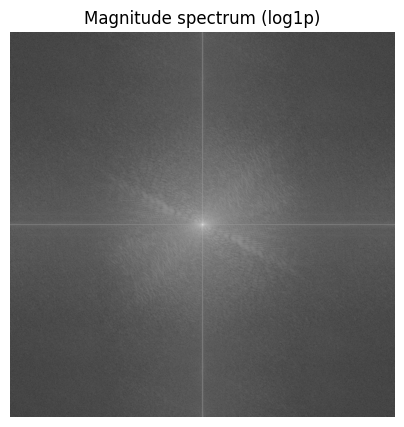

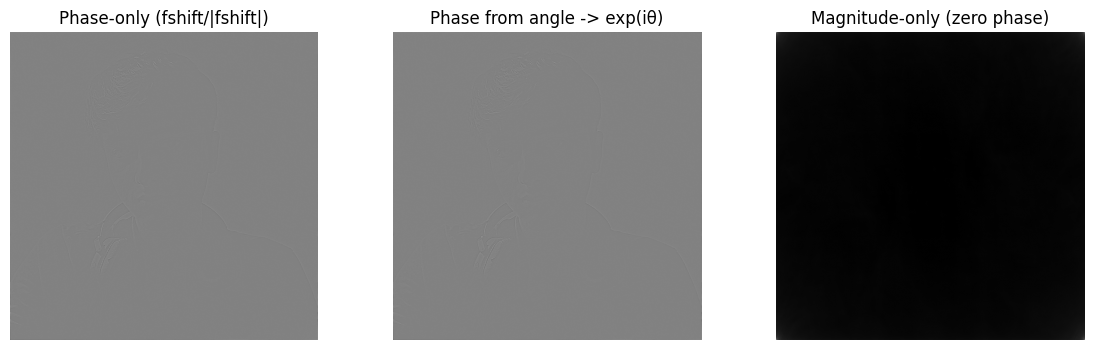


Phase-only (fshift/|fshift|): raw min=-2.090e-02, max=1.996e-02, mean=3.906e-07
Phase-only (fshift/|fshift|): display min=0, max=255, mean=129.9

Phase via angle->exp: raw min=-2.090e-02, max=1.996e-02, mean=3.906e-07
Phase via angle->exp: display min=0, max=255, mean=129.9

Magnitude-only: raw min=3.809e+01, max=4.532e+03, mean=1.342e+02
Magnitude-only: display min=0, max=255, mean=5.0


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io


def make_gray_and_fshift_from_upload():
    print("No existing fshift found — please upload the original image file.")
    uploaded = files.upload()
    name = next(iter(uploaded))
    img = Image.open(io.BytesIO(uploaded[name])).convert('RGB')
    arr = np.asarray(img).astype(np.float32) / 255.0
    gray = (0.299*arr[...,0] + 0.587*arr[...,1] + 0.114*arr[...,2]) * 255.0
    gray = np.clip(gray, 0, 255).astype(np.uint8)
    F = np.fft.fft2(gray.astype(np.float32))
    fshift_local = np.fft.fftshift(F)
    return gray, fshift_local


def normalize_for_display(x):
    x = np.real(x)
    x = x - x.min()
    if x.max() == 0:
        return (x*0).astype(np.uint8)
    x = x / x.max()
    return (x * 255).astype(np.uint8)


if 'fshift' not in globals():
    gray, fshift = make_gray_and_fshift_from_upload()
    print("Computed grayscale and fshift from uploaded image.")
else:
    fshift = globals()['fshift']

    gray = globals().get('gray_manual', globals().get('gray', None))


mag = np.abs(fshift)
print("FFT magnitude min/max:", mag.min(), mag.max())
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(mag), cmap='gray')
plt.title("Magnitude spectrum (log1p)"); plt.axis('off')

#D1
mag_safe = np.abs(fshift).copy()
mag_safe[mag_safe == 0] = 1e-12
phase_only = fshift / mag_safe
po_raw = np.fft.ifft2(np.fft.ifftshift(phase_only))
po_display = normalize_for_display(po_raw)

#  D1 alt using angle -> exp(i*angle)
angle = np.angle(fshift)
phase_complex = np.exp(1j * angle)
pc_raw = np.fft.ifft2(np.fft.ifftshift(phase_complex))
pc_display = normalize_for_display(pc_raw)

#D2
mag_only = np.abs(fshift)
mag_complex = mag_only * np.exp(1j * 0)
mo_raw = np.fft.ifft2(np.fft.ifftshift(mag_complex))
mo_display = normalize_for_display(mo_raw)


plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.imshow(po_display, cmap='gray'); plt.title('Phase-only (fshift/|fshift|)'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(pc_display, cmap='gray'); plt.title('Phase from angle -> exp(iθ)'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(mo_display, cmap='gray'); plt.title('Magnitude-only (zero phase)'); plt.axis('off')
plt.show()


def stats(name, raw, disp):
    rawr = np.real(raw)
    print(f"\n{name}: raw min={rawr.min():.3e}, max={rawr.max():.3e}, mean={rawr.mean():.3e}")
    print(f"{name}: display min={disp.min()}, max={disp.max()}, mean={disp.mean():.1f}")

stats("Phase-only (fshift/|fshift|)", po_raw, po_display)
stats("Phase via angle->exp", pc_raw, pc_display)
stats("Magnitude-only", mo_raw, mo_display)


# - fshift/|fshift| keeps the full complex form with unit magnitude; np.angle(fshift) only returns angles (real).
# - phase-only reconstructions preserve shape/edges (phase encodes structure).
# - magnitude-only reconstruction loses structure and looks like a smooth blob (magnitude lacks positional info).


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

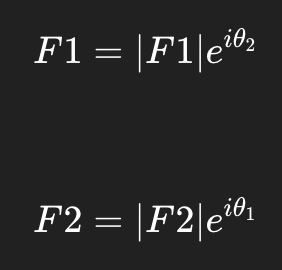

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.